In [226]:
%conda install pandas sklearn numpy

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - sklearn

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split



In [228]:
pd.options.display.max_rows = 999

pd.options.display.max_rows

999

In [229]:
dataset = "titanic"
dataset_directory = f"../../datasets/{dataset}"
training_dataset_directory = f"{dataset_directory}/train.csv"
test_dataset_directory = f"{dataset_directory}/test.csv"

In [230]:
titanic_train_dataframes = pd.read_csv(training_dataset_directory)
print(titanic_train_dataframes)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25          

# Transformations

One hot encoding the sex of each passenger. 

In [231]:
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

titanic_train_sex_dataframes = one_hot_encoder.fit_transform(titanic_train_dataframes["Sex"].values.reshape(-1, 1))
titanic_train_sex_dataframes.columns = one_hot_encoder.get_feature_names(['Sex'])
titanic_train_sex_dataframes = pd.DataFrame(titanic_train_sex_dataframes.toarray(), columns=titanic_train_sex_dataframes.columns)

titanic_train_dataframes.drop(['Sex'] ,axis=1, inplace=True)

titanic_train_dataframes= pd.concat([titanic_train_dataframes, titanic_train_sex_dataframes ], axis=1)

## Feature Engineering Notes

All `master`s were 12 or younger. Sources I've seen in preliminary research consider 12 and under (or under 12?) to be the child/adult cut off.

Should probably have a break out for child / adult and mother / father / son / daughter based on SibSp > 0 and the ages above. 

In [232]:
ages = titanic_train_dataframes["Age"].values.reshape(-1, 1)

sum_age = 0

for age in ages:
    if not pd.isna(age):
        sum_age = sum_age + age[0]

average_age = sum_age / ages.size

print(average_age)

titanic_train_dataframes["Age"].fillna(value=average_age, inplace=True)
ages = titanic_train_dataframes["Age"]

print(titanic_train_dataframes["Age"])

is_parent = []
is_child = []

for age in ages:
    if age > 12:
        is_parent.append(1)
        is_child.append(0)
    else: 
        is_parent.append(0)
        is_child.append(1)



is_parent_dataframes = pd.DataFrame(is_parent, columns=["isParent"])
is_child_dataframes = pd.DataFrame(is_child, columns=["isChild"])

titanic_train_dataframes= pd.concat([titanic_train_dataframes, is_parent_dataframes ], axis=1)
titanic_train_dataframes= pd.concat([titanic_train_dataframes, is_child_dataframes ], axis=1)
# titanic_train_sex_dataframes = one_hot_encoder.fit_transform(titanic_train_dataframes["Sex"].values.reshape(-1, 1))
# titanic_train_sex_dataframes.columns = one_hot_encoder.get_feature_names(['Sex'])
# titanic_train_sex_dataframes = pd.DataFrame(titanic_train_sex_dataframes.toarray(), columns=titanic_train_sex_dataframes.columns)

# titanic_train_dataframes.drop(['Sex'] ,axis=1, inplace=True)

# titanic_train_dataframes= pd.concat([titanic_train_dataframes, titanic_train_sex_dataframes ], axis=1)

print(titanic_train_dataframes)

23.79929292929293
0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
5      23.799293
6      54.000000
7       2.000000
8      27.000000
9      14.000000
10      4.000000
11     58.000000
12     20.000000
13     39.000000
14     14.000000
15     55.000000
16      2.000000
17     23.799293
18     31.000000
19     23.799293
20     35.000000
21     34.000000
22     15.000000
23     28.000000
24      8.000000
25     38.000000
26     23.799293
27     19.000000
28     23.799293
29     23.799293
30     40.000000
31     23.799293
32     23.799293
33     66.000000
34     28.000000
35     42.000000
36     23.799293
37     21.000000
38     18.000000
39     14.000000
40     40.000000
41     27.000000
42     23.799293
43      3.000000
44     19.000000
45     23.799293
46     23.799293
47     23.799293
48     23.799293
49     18.000000
50      7.000000
51     21.000000
52     49.000000
53     29.000000
54     65.000000
55     23.799293
56     21.000000
57     28.500

In [233]:
titanic_train_dataframes.drop(['Name'] ,axis=1, inplace=True)
titanic_train_dataframes.drop(['Embarked'] ,axis=1, inplace=True)
titanic_train_dataframes.drop(['Ticket'] ,axis=1, inplace=True)
titanic_train_dataframes.drop(['Cabin'] ,axis=1, inplace=True)

In [234]:
y = titanic_train_dataframes["Survived"]

titanic_train_dataframes.drop(['Survived'] ,axis=1, inplace=True)

X = titanic_train_dataframes

In [240]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13
)
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
}

In [236]:
print(titanic_train_dataframes)
print(X_train)
print(y_train)

     PassengerId  Pclass        Age  SibSp  Parch      Fare  Sex_female  \
0              1       3  22.000000      1      0    7.2500         0.0   
1              2       1  38.000000      1      0   71.2833         1.0   
2              3       3  26.000000      0      0    7.9250         1.0   
3              4       1  35.000000      1      0   53.1000         1.0   
4              5       3  35.000000      0      0    8.0500         0.0   
5              6       3  23.799293      0      0    8.4583         0.0   
6              7       1  54.000000      0      0   51.8625         0.0   
7              8       3   2.000000      3      1   21.0750         0.0   
8              9       3  27.000000      0      2   11.1333         1.0   
9             10       2  14.000000      1      0   30.0708         1.0   
10            11       3   4.000000      1      1   16.7000         1.0   
11            12       1  58.000000      0      0   26.5500         1.0   
12            13       3 

In [242]:
reg = ensemble.GradientBoostingRegressor(**params)
print(reg.loss)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

ls
The mean squared error (MSE) on test set: 0.1024


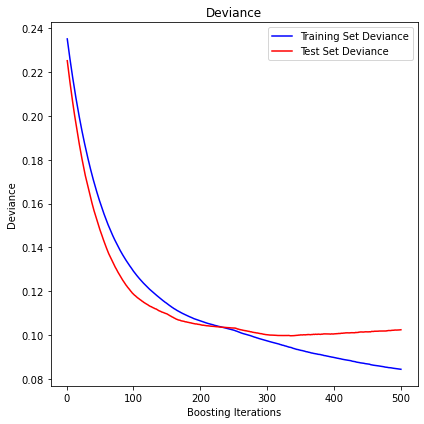

In [243]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

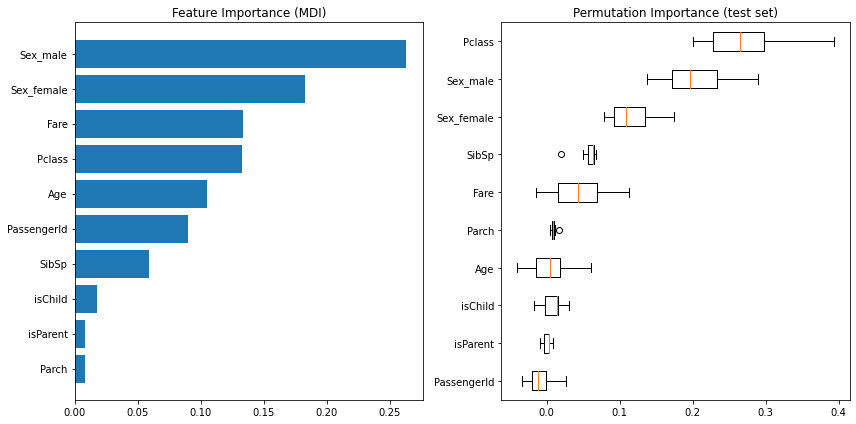

In [246]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(titanic_train_dataframes.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(titanic_train_dataframes.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()